# PyVISA

### List resources, open resource

In [1]:
import pyvisa 
rm = pyvisa.ResourceManager()
# Print what backend is used
print(rm)

# Print list of available resources
print(rm.list_resources())

# Open the resource
mso = rm.open_resource(rm.list_resources()[0])

# Write a command 
res = mso.query('*IDN?')

# print the response
print(res)

Resource Manager of Visa Library at C:\Windows\system32\visa32.dll
('USB0::0x0957::0x1797::MY55460289::0::INSTR',)
AGILENT TECHNOLOGIES,MSO-X 2022A,MY55460289,02.41.2015102200



### Change settings

In [6]:
# Use auto-scale for automatic set up 
mso.write(":AUToscale")

12

In [3]:
# Set trigger mode
mso.write(":TRIGger:MODE EDGE")
qresult = mso.query(":TRIGger:MODE?")
print(f"Trigger mode: {qresult}")

Trigger mode: EDGE



In [5]:
# Set EDGE trigger parameters.
mso.write(":TRIGger:EDGE:SOURce CHANnel1")
qresult = mso.query(":TRIGger:EDGE:SOURce?")
print(f"Trigger edge source:{qresult}")
mso.write(":TRIGger:EDGE:LEVel 0.1")
qresult = mso.query(":TRIGger:EDGE:LEVel?")
print(f"Trigger edge level: {qresult}")
mso.write(":TRIGger:EDGE:SLOPe POSitive")
qresult = mso.query(":TRIGger:EDGE:SLOPe?")
print(f"Trigger edge slope: {qresult}")

Trigger edge source:CHAN1

Trigger edge level: +100.00E-03

Trigger edge slope: POS



In [8]:
# Set vertical scale and offset.
mso.write(":CHANnel1:SCALe 1v")
qresult = mso.query(":CHANnel1:SCALe?")
print(f"Channel 1 vertical scale: {qresult}")
mso.write(":CHANnel1:OFFSet 0.0")
qresult = mso.query(":CHANnel1:OFFSet?")
print(f"Channel 1 offset: {qresult}")

Channel 1 vertical scale: +1.00E+00

Channel 1 offset: +0.0E+00



In [9]:
# Set horizontal scale and offset.
mso.write(":TIMebase:SCALe 200e-6")
qresult = mso.query(":TIMebase:SCALe?")
print(f"Timebase scale: {qresult}")
mso.write(":TIMebase:POSition 0.0")
qresult = mso.query(":TIMebase:POSition?")
print(f"Timebase position: {qresult}")

Timebase scale: +200.0E-06

Timebase position: +0.0E+00



### Make measurements

In [10]:
# Capture an acquisition using :DIGitize.
mso.write(":DIGitize CHANnel1")

# Make measurements.
mso.write(":MEASure:SOURce CHANnel1")
qresult = mso.query(":MEASure:SOURce?")
print(f"Measure source: {qresult}")
mso.write(":MEASure:FREQuency")
qresult = mso.query(":MEASure:FREQuency?")
print(f"Measured frequency on channel 1: {qresult}")
mso.write(":MEASure:VAMPlitude")
qresult = mso.query(":MEASure:VAMPlitude?")
print(f"Measured vertical amplitude on channel 1: {qresult}")


Measure source: CHAN1,CHAN2

Measured frequency on channel 1: +1.9982E+03

Measured vertical amplitude on channel 1: +1.13E+00



### Capture screen

Screen image written.


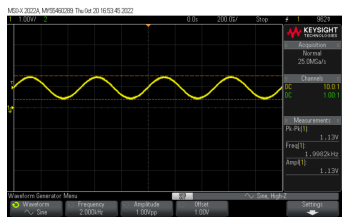

In [11]:
# Download the screen.
mso.write(":HARDcopy:INKSaver OFF")
sDisplay  = mso.query_binary_values(":DISPlay:DATA? PNG, COLor", datatype="s")
# Save display data values to file.
# with open("screen_image.png", "wb") as f:
#     f.write(bytes(sDisplay))
print("Screen image written.")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io

img = bytes(sDisplay)
with io.BytesIO(img) as fp:
    i = mpimg.imread(fp, format='png')
plt.imshow(i)
plt.axis(False)
plt.show()

### Download waveform data

In [12]:
# Set the waveform source.
mso.write(":WAVeform:SOURce CHANnel1")
qresult = mso.query(":WAVeform:SOURce?")
print("Waveform source: %s" % qresult)

# Choose the format of the data returned:
mso.write(":WAVeform:FORMat BYTE")
print(f'Waveform format: {mso.query(":WAVeform:FORMat?")}')
    
# Set the waveform points 
mso.write(":WAVeform:POINts:MODE RAW")
qresult = mso.query(":WAVeform:POINts:MODE?")
print(f"Waveform points mode: {qresult}")

# Get the number of waveform points available.
mso.write(":WAVeform:POINts 10000")
qresult = mso.query(":WAVeform:POINts?")
print(f"Waveform points available: {qresult}")

# Get numeric values for later calculations.
x_increment = float(mso.query(":WAVeform:XINCrement?"))
x_origin = float(mso.query(":WAVeform:XORigin?"))
y_increment = float(mso.query(":WAVeform:YINCrement?"))
y_origin = float(mso.query(":WAVeform:YORigin?"))
x_reference = float(mso.query(":WAVeform:XREFerence?"))
y_reference = float(mso.query(":WAVeform:YREFerence?"))

# Get the waveform data.
sData = mso.query_binary_values(":WAVeform:DATA?", datatype="s")
print(f"Number of data values: {len(sData)}")
with open("data/waveform_data.csv", "w") as f:
    for i in range(0, len(sData) - 1):
        time_val = x_origin + ((i - x_reference) * x_increment)
        voltage = ((sData[i] - y_reference) * y_increment) + y_origin
        f.write(f"{time_val}, {voltage}\n")
print("Waveform data written.")


Waveform source: CHAN1

Waveform format: BYTE

Waveform points mode: RAW

Waveform points available: +10000

Number of data values: 10000
Waveform data written.


In [13]:
# Close resource
mso.close()

In [ ]:
# Close session
rm.close()